/home/vladislave/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


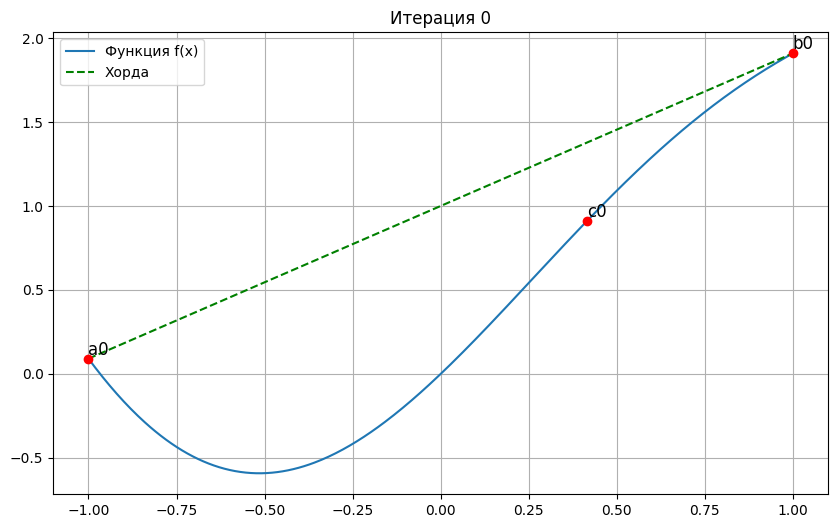

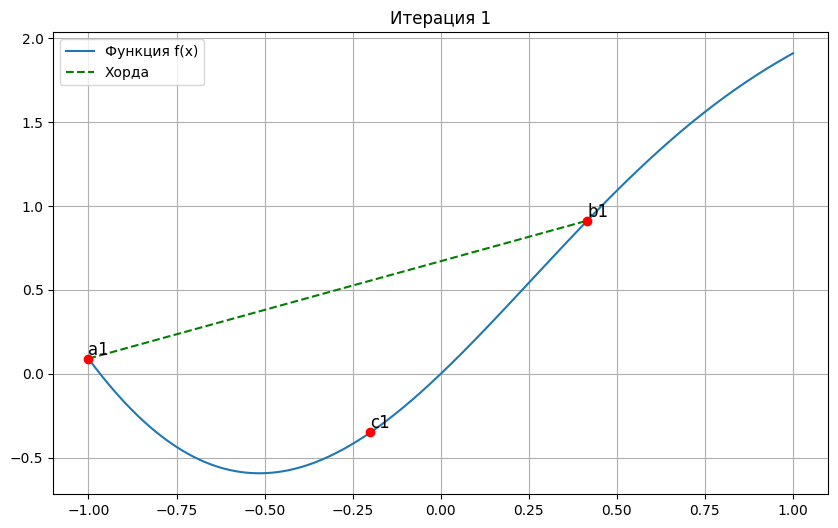

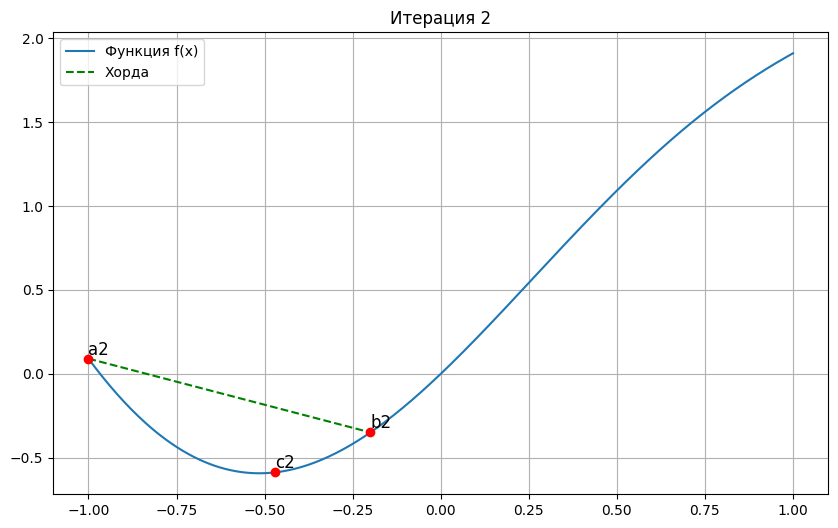

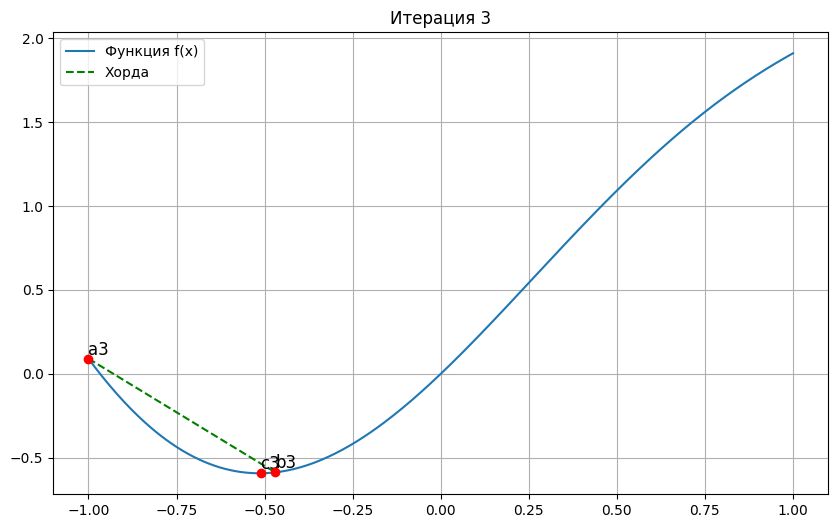

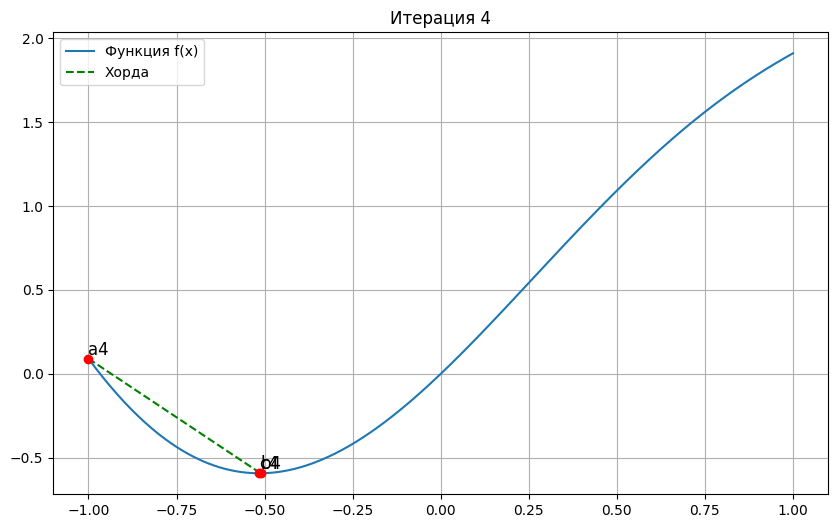

Метод хорд: минимум функции находится в точке x = -0.5149319972887663, значение функции = -0.5920740012735837


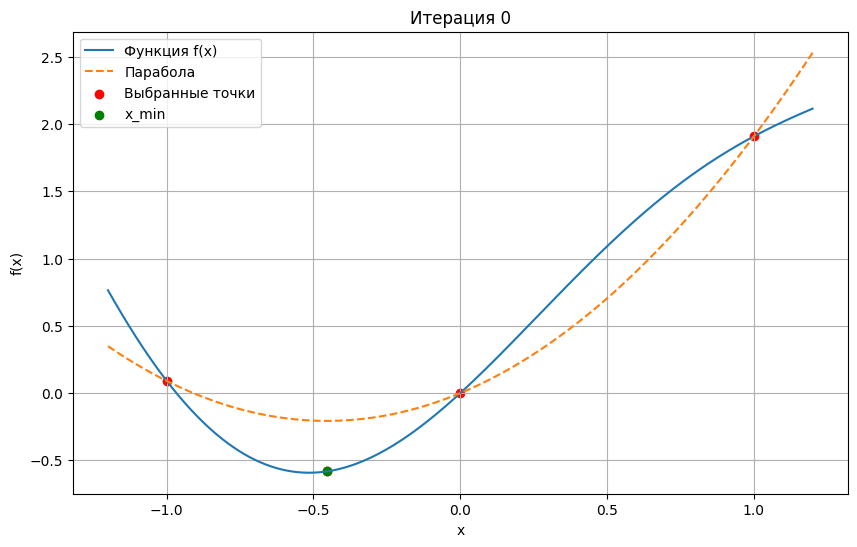

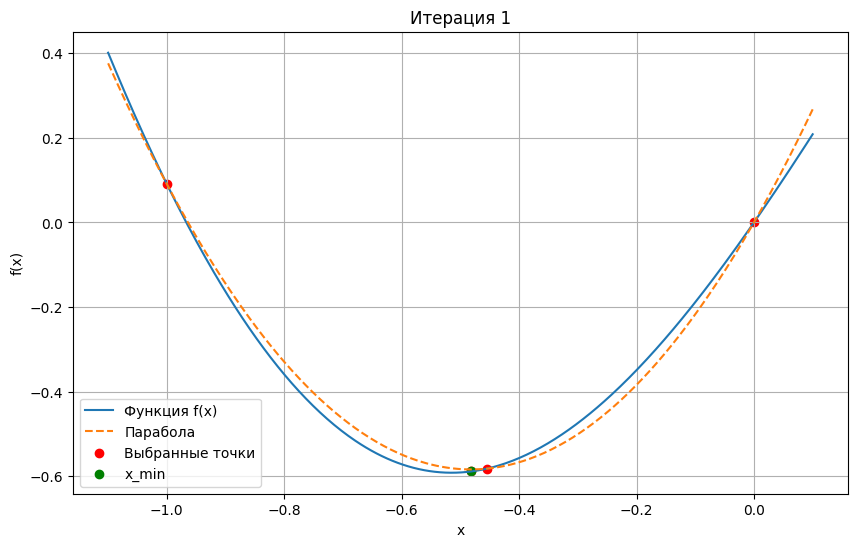

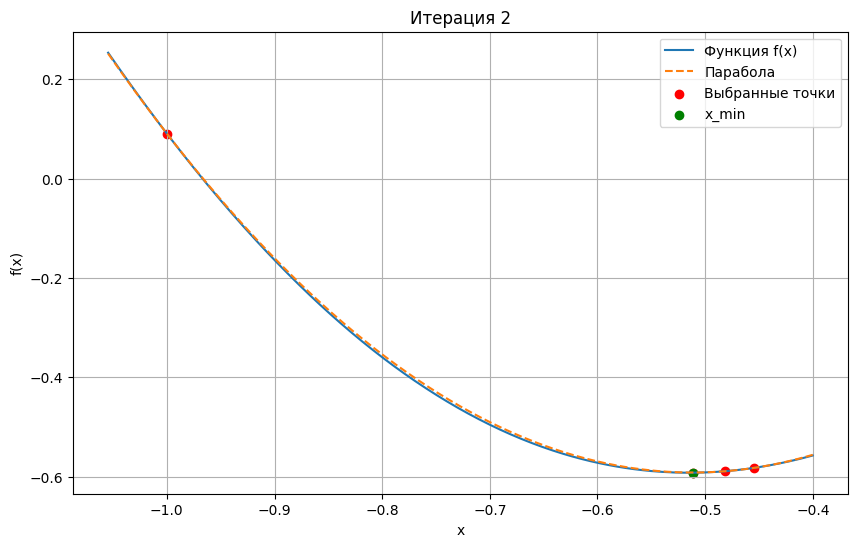

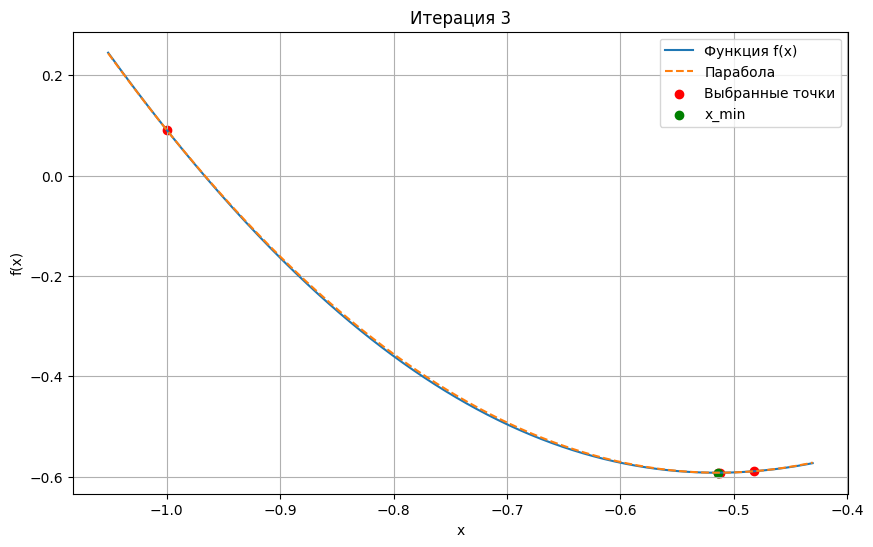

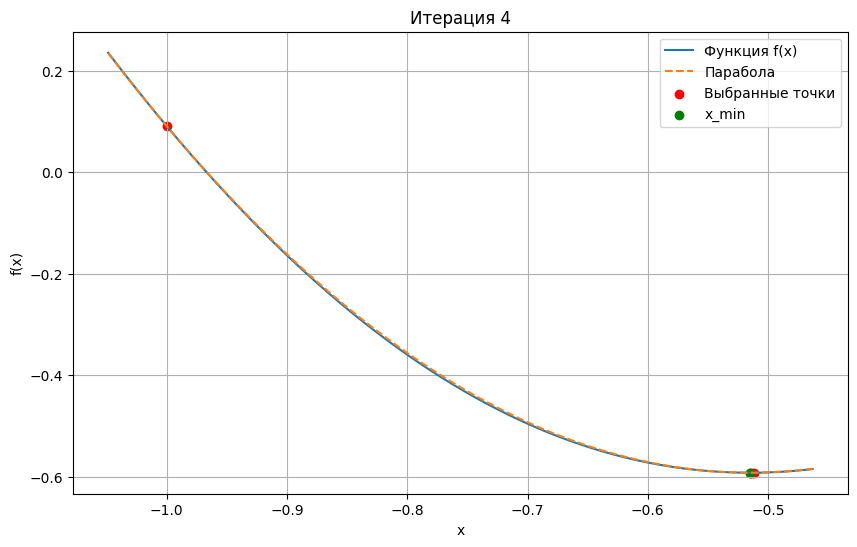

Метод парабол: минимум функции находится в точке x = -0.5149316303571378, значение функции = -0.5920740012706935


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + np.sin(2 * x)

def numerical_derivative(func, x, h=1e-5): # вычисление численной производной
    return (func(x + h) - func(x - h)) / (2 * h)

# метод хорд для нахождения минимума функции
def secant_method_minimization_with_derivatives(func, a, b, eps=1e-5, max_iter=100):
    for i in range(max_iter):
        # вычисляем производные в точках a и b
        f_prime_a = numerical_derivative(func, a)
        f_prime_b = numerical_derivative(func, b)

        # вычисляем секущую точку (хорду типа)
        c = (a * f_prime_b - b * f_prime_a) / (f_prime_b - f_prime_a)

        # проверка на сходимость
        if abs(numerical_derivative(func, c)) < eps or abs(c - b) < eps:
            return c, func(c)

        #визуализация первых пяти итераций
        if i < 5:
            visualize_iteration(func, a, b, c, i)

        #обновляем a или b в зависимости от производной
        if numerical_derivative(func, c) > 0:
            b = c
        else:
            a = c

    raise ValueError("Минимум не найден за максимальное число итераций")

def visualize_iteration(func, a, b, c, iteration):
    x = np.linspace(-1, 1, 400)  # генерируем 400 точек для оси x
    y = np.vectorize(func)(x)    # вычисляем значения функции f(x) для каждой точки

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Функция f(x)')  
    plt.scatter([a, b, c], [func(a), func(b), func(c)], color='red', zorder=5)  
    plt.plot([a, b], [func(a), func(b)], 'g--', label='Хорда')  
    
    # Подписываем точки a, b и c
    plt.text(a, func(a), f'a{iteration}', fontsize=12, verticalalignment='bottom')
    plt.text(b, func(b), f'b{iteration}', fontsize=12, verticalalignment='bottom')
    plt.text(c, func(c), f'c{iteration}', fontsize=12, verticalalignment='bottom')

    plt.title(f'Итерация {iteration}') 
    plt.legend()
    plt.grid(True)
    plt.show() 


x_min, f_min = secant_method_minimization_with_derivatives(f, -1, 1)
print(f"Метод хорд: минимум функции находится в точке x = {x_min}, значение функции = {f_min}")

# метод для поиска минимума методом парабол
def parabola_method(a, b, eps=1e-5):
    c = (a + b) / 2  # начальное значение для c
    i = 0
    while abs(b - a) > eps:  
        fa, fb, fc = f(a), f(b), f(c)  
        
        #По трём точкам вычисляется коэффициенты параболы
        p_a = (fa * (b - c) + fb * (c - a) + fc * (a - b)) / ((a - b) * (a - c) * (b - c))
        p_b = (fa * (c**2 - b**2) + fb * (a**2 - c**2) + fc * (b**2 - a**2)) / ((a - b) * (a - c) * (b - c))
        p_c = (fa * (b * c * (b - c)) + fb * (a * c * (c - a)) + fc * (a * b * (a - b))) / ((a - b) * (a - c) * (b - c))

        # вершина параболы
        x_min = -p_b / (2 * p_a)
        f_min = f(x_min) # вычисляется значение функции в этой точке

        # визуализация первых пяти итераций
        if i < 5:
            visualize_parabola(a, b, c, fa, fb, fc, x_min, f_min, p_a, p_b, p_c, i)

        # обновление интервалов в зависимости от минимального значения
        if x_min < c:
            if f_min < fc:
                b = c
                c = x_min
            else:
                a = x_min
        else:
            if f_min < fc:
                a = c
                c = x_min
            else:
                b = x_min

        i += 1  # Увеличиваем номер итерации

        # проверка на сходимость
        if abs(x_min - a) < eps or abs(x_min - b) < eps:
            break

    return x_min, f_min  # возвращаем минимум функции и его значение

# визуализация параболы
def visualize_parabola(a, b, c, fa, fb, fc, x_min, f_min, A, B, C, iteration):
    x_vals = np.linspace(a - (b - a) * 0.1, b + (b - a) * 0.1, 400)
    y_vals = A * x_vals**2 + B * x_vals + C  # значения параболы
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, f(x_vals), label='Функция f(x)')  
    plt.plot(x_vals, y_vals, label='Парабола', linestyle='--')  
    plt.scatter([a, b, c, x_min], [fa, fb, fc, f_min], color='red', label='Выбранные точки') 
    plt.scatter(x_min, f_min, color='green', label='x_min')  
    plt.title(f'Итерация {iteration}')  
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show() 


x_min, f_min = parabola_method(-1, 1)
print(f"Метод парабол: минимум функции находится в точке x = {x_min}, значение функции = {f_min}")
